In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
# Read saved csv files
Data = pd.read_csv('Data.csv', index_col=0)
# Data = Data[10080:].reset_index(drop=True)    # One week

In [3]:
Data

,start time,lock time,close time,epoch,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
0,1650251926,1650252226,1650252526,9,39804.06,39824.30,20.24,15.4700,7.8164,7.8164,1
1,1650252235,1650252535,1650252835,10,39824.30,39817.06,-7.24,11.2942,5.7065,5.7065,0
2,1650252541,1650252841,1650253141,11,39817.06,39816.73,-0.33,14.1498,7.1494,7.1494,0
3,1650252848,1650253148,1650253448,12,39816.73,39826.39,9.66,12.6801,6.4068,6.4068,1
4,1650253157,1650253457,1650253757,13,39826.39,39851.42,25.03,10.2198,5.1637,5.1637,1
...,...,...,...,...,...,...,...,...,...,...,...
3485,1651320976,1651321276,1651321576,3494,38565.63,38585.44,19.81,21.5631,10.8571,10.7060,1
3486,1651321282,1651321582,1651321882,3495,38585.44,38604.62,19.18,20.9530,10.4845,10.4685,1
3487,1651321588,1651321888,1651322188,3496,38604.62,38562.02,-42.60,21.2856,10.5928,10.6928,0
3488,1651321894,1651322194,1651322494,3497,38562.02,38551.49,-10.53,20.9466,10.5876,10.3589,0


In [4]:
Data['start time'] = pd.to_datetime(Data['start time'],unit='s')
Data['lock time'] = pd.to_datetime(Data['lock time'],unit='s')
Data['close time'] = pd.to_datetime(Data['close time'],unit='s')

In [5]:
Data.head()

,start time,lock time,close time,epoch,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
0,2022-04-18 03:18:46,2022-04-18 03:23:46,2022-04-18 03:28:46,9,39804.06,39824.30,20.24,15.4700,7.8164,7.8164,1
1,2022-04-18 03:23:55,2022-04-18 03:28:55,2022-04-18 03:33:55,10,39824.30,39817.06,-7.24,11.2942,5.7065,5.7065,0
2,2022-04-18 03:29:01,2022-04-18 03:34:01,2022-04-18 03:39:01,11,39817.06,39816.73,-0.33,14.1498,7.1494,7.1494,0
3,2022-04-18 03:34:08,2022-04-18 03:39:08,2022-04-18 03:44:08,12,39816.73,39826.39,9.66,12.6801,6.4068,6.4068,1
4,2022-04-18 03:39:17,2022-04-18 03:44:17,2022-04-18 03:49:17,13,39826.39,39851.42,25.03,10.2198,5.1637,5.1637,1


In [6]:
Data.tail()

,start time,lock time,close time,epoch,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
3485,2022-04-30 12:16:16,2022-04-30 12:21:16,2022-04-30 12:26:16,3494,38565.63,38585.44,19.81,21.5631,10.8571,10.7060,1
3486,2022-04-30 12:21:22,2022-04-30 12:26:22,2022-04-30 12:31:22,3495,38585.44,38604.62,19.18,20.9530,10.4845,10.4685,1
3487,2022-04-30 12:26:28,2022-04-30 12:31:28,2022-04-30 12:36:28,3496,38604.62,38562.02,-42.60,21.2856,10.5928,10.6928,0
3488,2022-04-30 12:31:34,2022-04-30 12:36:34,2022-04-30 12:41:34,3497,38562.02,38551.49,-10.53,20.9466,10.5876,10.3589,0
3489,2022-04-30 12:36:40,2022-04-30 12:41:40,2022-04-30 12:46:40,3498,38551.49,38557.31,5.82,21.1966,10.7233,10.4733,1


In [7]:
Data.drop(columns=["epoch", "start time", "close time"], inplace=True)

In [8]:
Data.head()

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
0,2022-04-18 03:23:46,39804.06,39824.30,20.24,15.4700,7.8164,7.8164,1
1,2022-04-18 03:28:55,39824.30,39817.06,-7.24,11.2942,5.7065,5.7065,0
2,2022-04-18 03:34:01,39817.06,39816.73,-0.33,14.1498,7.1494,7.1494,0
3,2022-04-18 03:39:08,39816.73,39826.39,9.66,12.6801,6.4068,6.4068,1
4,2022-04-18 03:44:17,39826.39,39851.42,25.03,10.2198,5.1637,5.1637,1


In [9]:
Data.tail()

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
3485,2022-04-30 12:21:16,38565.63,38585.44,19.81,21.5631,10.8571,10.7060,1
3486,2022-04-30 12:26:22,38585.44,38604.62,19.18,20.9530,10.4845,10.4685,1
3487,2022-04-30 12:31:28,38604.62,38562.02,-42.60,21.2856,10.5928,10.6928,0
3488,2022-04-30 12:36:34,38562.02,38551.49,-10.53,20.9466,10.5876,10.3589,0
3489,2022-04-30 12:41:40,38551.49,38557.31,5.82,21.1966,10.7233,10.4733,1


In [10]:
# map timestamp to a variable x
x = np.linspace(0, len(Data), len(Data))

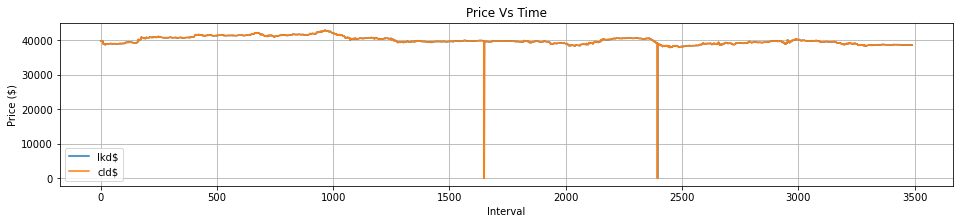

In [11]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.plot(x, Data['Locked price'], label=r'lkd$')
axes.plot(x, Data['Close price'], label=r'cld$')
axes.set_xlabel('Interval')
axes.set_ylabel('Price ($)')
axes.set_title('Price Vs Time')

# axes.set_ylim(0,750)
axes.legend()
axes.grid()

### Data Quality

#### Check for null values

In [12]:
Data.isnull().any()

lock time       False
Locked price    False
Close price     False
Change          False
Total BNB       False
Up BNB          False
Down BNB        False
Win/Lose        False
dtype: bool

In [13]:
Data.isnull().sum()

lock time       0
Locked price    0
Close price     0
Change          0
Total BNB       0
Up BNB          0
Down BNB        0
Win/Lose        0
dtype: int64

In [14]:
Data.isnull().sum().sum()

0

#### Remove Zeros

In [15]:
len(Data)

3490

In [16]:
Data.eq(0).sum()

lock time          0
Locked price       2
Close price        4
Change             3
Total BNB         44
Up BNB            46
Down BNB          47
Win/Lose        1749
dtype: int64

In [17]:
# Data = Data.replace(0, np.nan)
# Data = Data.dropna(subset = ['Locked price', 'Close price'])
# Data = Data.replace(np.nan, 0)

In [18]:
Data.describe()

,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,39895.922957,39873.023430,-22.899527,17.741497,8.925623,8.841145,0.498854
std,1417.659689,1709.368217,946.557329,7.088435,3.579457,3.559974,0.500070
min,0.000000,0.000000,-39790.740000,0.000000,0.000000,0.000000,0.000000
25%,39112.190000,39110.052500,-27.927500,12.018500,6.022800,5.985125,0.000000
50%,39688.505000,39688.170000,-0.010000,18.084500,9.053750,8.900650,0.000000
75%,40681.852500,40681.852500,26.110000,22.700125,11.419275,11.315875,1.000000
max,42900.710000,42900.710000,771.880000,34.054100,17.649800,17.272900,1.000000


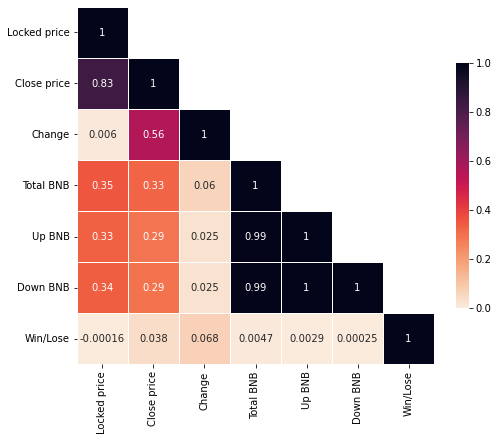

In [19]:
# The above as a plot

corr = Data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

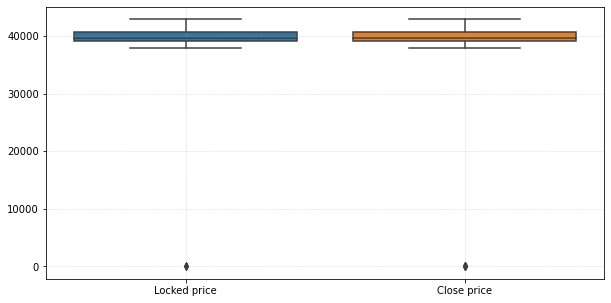

In [20]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=Data[['Locked price', 'Close price']])

ax.grid(linestyle='--', linewidth=0.5, alpha =0.5)

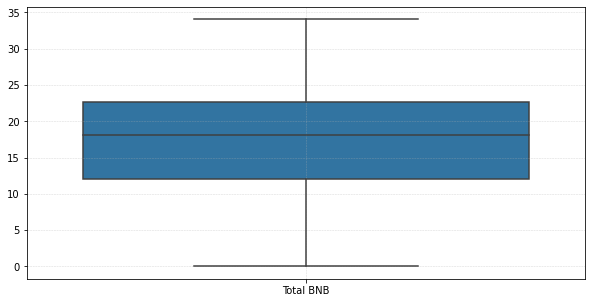

In [21]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=Data[['Total BNB']])

ax.grid(linestyle='--', linewidth=0.5, alpha =0.5)

In [22]:
Data.isnull().sum().sum()

0

In [23]:
Data.head(10)[['lock time','Win/Lose']]

,lock time,Win/Lose
0,2022-04-18 03:23:46,1
1,2022-04-18 03:28:55,0
2,2022-04-18 03:34:01,0
3,2022-04-18 03:39:08,1
4,2022-04-18 03:44:17,1
5,2022-04-18 03:49:23,0
6,2022-04-18 03:54:32,0
7,2022-04-18 03:59:41,0
8,2022-04-18 04:04:47,0
9,2022-04-18 04:09:53,0


In [24]:
b = Data.head(10).groupby(pd.Grouper(key='lock time', freq='10min')).mean()['Win/Lose']

In [25]:
b

lock time
2022-04-18 03:20:00    0.5
2022-04-18 03:30:00    0.5
2022-04-18 03:40:00    0.5
2022-04-18 03:50:00    0.0
2022-04-18 04:00:00    0.0
Freq: 10T, Name: Win/Lose, dtype: float64

In [26]:
a = Data.groupby(pd.Grouper(key='lock time', freq='10min')).mean()['Win/Lose']

In [27]:
a

lock time
2022-04-18 03:20:00    0.5
2022-04-18 03:30:00    0.5
2022-04-18 03:40:00    0.5
2022-04-18 03:50:00    0.0
2022-04-18 04:00:00    0.0
                      ... 
2022-04-30 12:00:00    0.5
2022-04-30 12:10:00    0.0
2022-04-30 12:20:00    1.0
2022-04-30 12:30:00    0.0
2022-04-30 12:40:00    1.0
Freq: 10T, Name: Win/Lose, Length: 1785, dtype: float64

In [28]:
Data[332:340]

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
332,2022-04-19 07:38:22,40673.67,40655.68,-17.99,11.3758,5.5925,5.9031,0
333,2022-04-19 07:43:28,40655.68,40691.72,36.04,11.2183,5.6682,5.6682,1
334,2022-04-19 07:48:34,40691.72,40653.59,-38.13,12.2285,6.1786,6.1786,0
335,2022-04-19 07:53:40,40653.59,40689.99,36.40,11.7116,5.8547,5.9802,1
336,2022-04-19 07:58:46,40689.99,40712.07,22.08,11.1924,5.6551,5.6551,1
337,2022-04-19 08:03:52,40712.07,40732.79,20.72,12.6181,6.2605,6.4905,1
338,2022-04-19 08:08:58,40732.79,40745.70,12.91,13.0005,6.5322,6.6051,1
339,2022-04-19 08:14:04,40745.70,40741.12,-4.58,12.0504,5.8177,6.3596,0


# Visualization

In [29]:
# df = Data.groupby([Data['time 2'].dt.weekday, Data['time 2'].dt.hour]).mean()['Win/Lose']

In [30]:
df = a.groupby([a.index.weekday, a.index.hour, a.index.minute]).mean()

In [31]:
df

lock time  lock time  lock time
0          0          0            0.0
                      10           0.0
                      20           0.0
                      30           0.5
                      40           0.0
                                  ... 
6          23         10           0.0
                      20           0.5
                      30           0.0
                      40           0.0
                      50           0.0
Name: Win/Lose, Length: 1008, dtype: float64

In [32]:
# df.index is a triple (Day, Hour, Min), This code picks only the day

index = []

for x in df.index:
    index.append(x[0])

In [33]:
df1 = pd.DataFrame(data=df.values, index=index, columns=['mean'])

In [34]:
df1

,mean
0,0.0
0,0.0
0,0.0
0,0.5
0,0.0
...,...
6,0.0
6,0.5
6,0.0
6,0.0


In [35]:
x = 0
y = 0
z = []

for i in df1.index:
    if i == x:
        z.append(y)
        y+=1
    elif i != x:
        x = i
        y = 0
        z.append(y)
        y += 1

In [36]:
df1['day'] = df1.index
df1['Time'] = z

In [37]:
df1

,mean,day,Time
0,0.0,0,0
0,0.0,0,1
0,0.0,0,2
0,0.5,0,3
0,0.0,0,4
...,...,...,...
6,0.0,6,139
6,0.5,6,140
6,0.0,6,141
6,0.0,6,142


In [38]:
df2 = df1.pivot(index='Time',columns='day',values='mean')

In [39]:
df2.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day')

In [40]:
df2.rename(columns={  
            0  : 'Mon',
            1  : 'Tue',
            2  : 'Wed',
            3  : 'Thu',
            4  : 'Fri',
            5  : 'Sat',
            6  : 'Sun'
                   },  
           inplace=True
          )

In [41]:
df2.T

Time,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
day,,,,,,,,,,,,,,,,,,,,,
Mon,0.00,0.00,0.000000,0.50,0.00,0.50,0.50,1.00,0.50,1.00,...,0.75,0.75,0.75,0.75,0.25,1.00,0.50,0.50,0.75,0.50
Tue,0.50,0.50,1.000000,0.25,0.25,0.25,0.50,0.50,0.25,0.25,...,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.75,0.25,0.50
Wed,0.75,0.25,0.500000,0.25,1.00,0.25,0.75,1.00,0.50,0.75,...,0.25,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.75,0.50
Thu,0.75,0.25,1.000000,0.25,0.75,0.75,0.50,0.25,0.50,0.50,...,0.00,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.50
Fri,0.50,0.25,0.250000,0.50,0.50,0.75,0.75,0.50,0.75,0.50,...,0.50,0.50,1.00,0.25,0.75,0.50,0.50,0.50,0.50,0.75
Sat,0.75,0.50,0.000000,0.50,0.25,0.75,0.50,0.50,1.00,0.50,...,1.00,1.00,0.50,0.00,0.00,1.00,0.50,0.00,NaN,NaN
Sun,NaN,NaN,0.666667,0.50,0.00,1.00,1.00,0.50,0.50,0.50,...,0.00,0.00,0.00,0.50,0.50,0.00,0.50,0.00,0.00,0.00


In [42]:
df2.T.to_csv("00week.csv")

In [43]:
df2.iloc[10]

day
Mon    0.00
Tue    0.25
Wed    0.25
Thu    0.00
Fri    0.50
Sat    0.75
Sun    0.50
Name: 10, dtype: float64

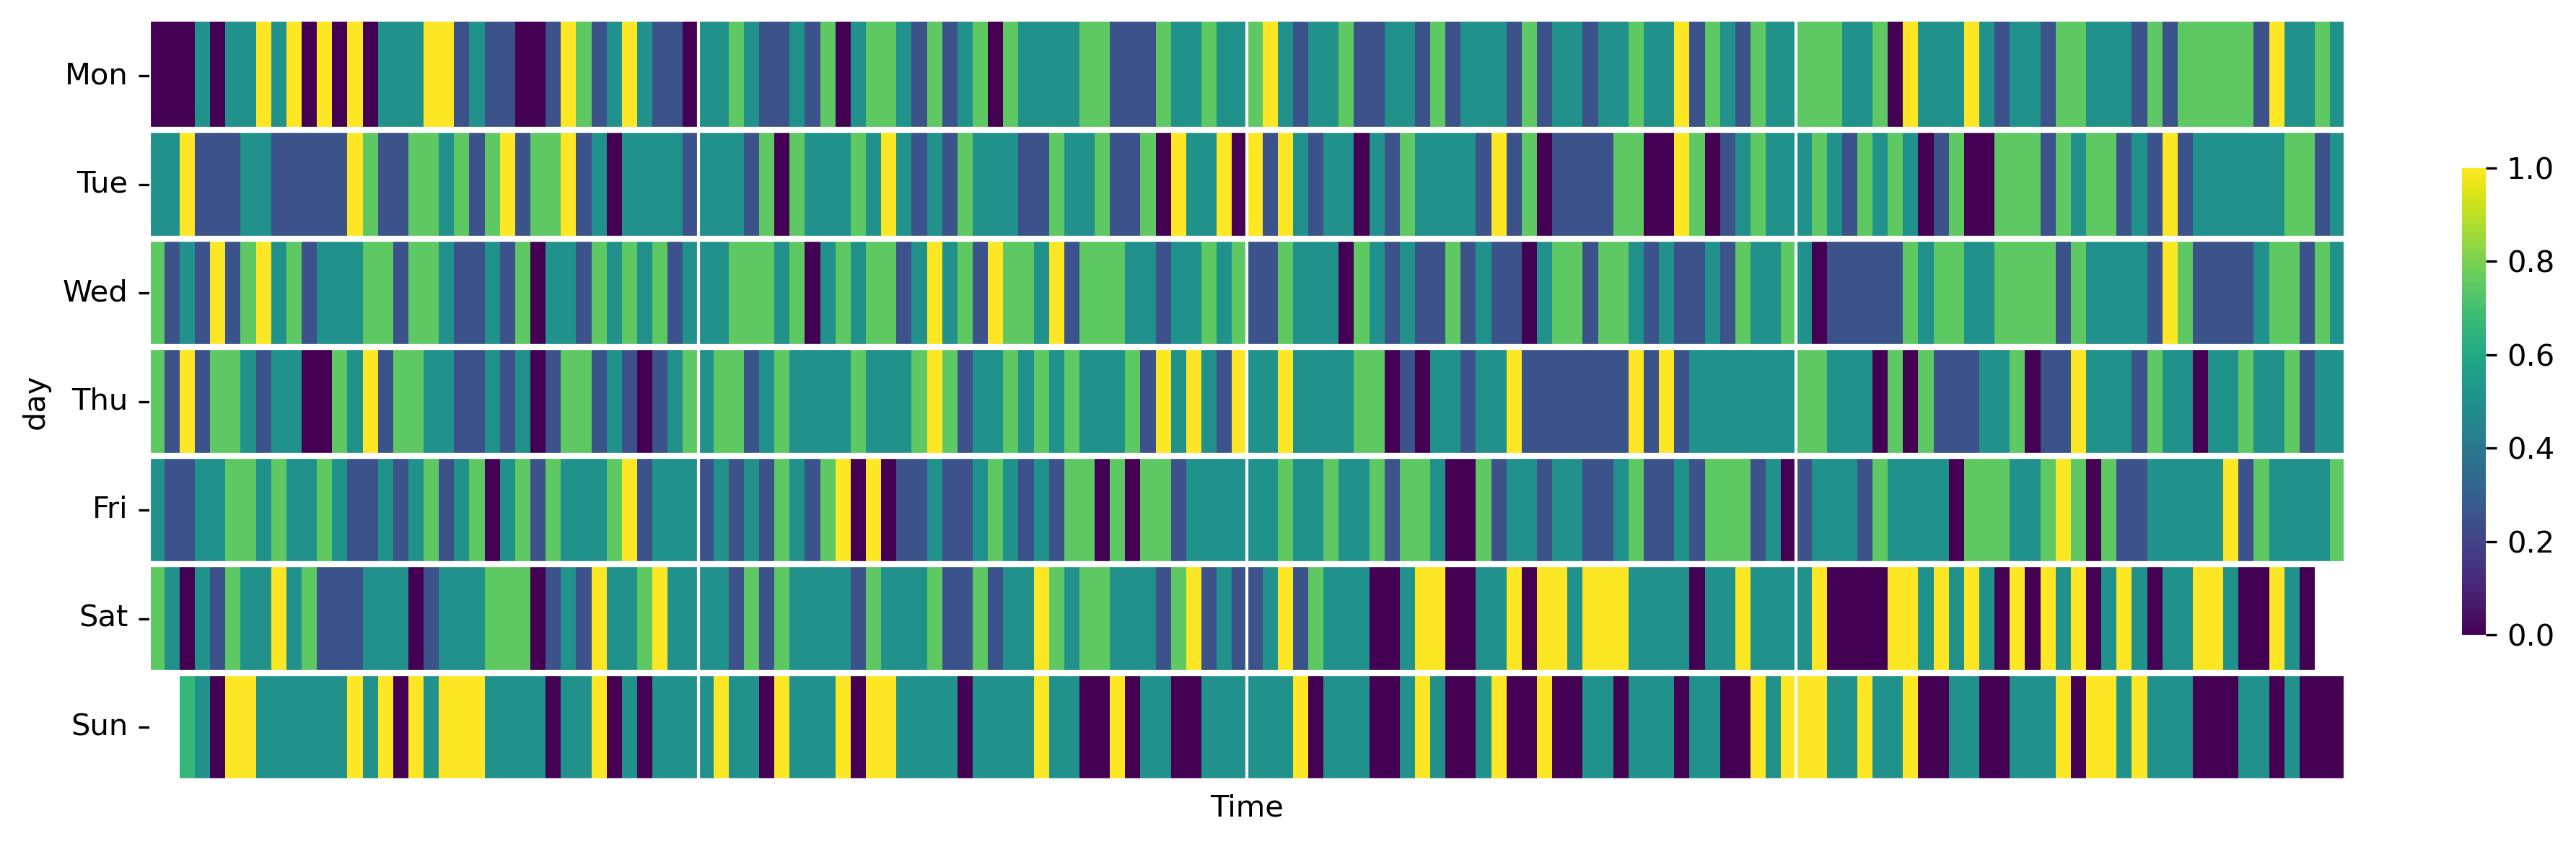

In [44]:
plt.figure(figsize=(12,4), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )


for i in range(1,df2.T.shape[0]+1):
    hmap.axhline(i, color='white', lw=2)
for j in ticks:
    hmap.axvline(j, color='white', lw=1)
    
    
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
#hmap.set_xticks([0, 6, 12, 18, 24, 30, 36, 42, 48]);
#hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()

In [45]:
df4 = df2.T >= 0.7

In [46]:
df4.sum().sum()

297

In [47]:
df4 = df2.T <= 0.3

In [48]:
df4.sum().sum()

299